## Cookie Cats is popular mobile puzzle game developed by Tactile Entertainment. It is a "connect-three" puzzle game where the player connect tiles of same color to clear the board and win the level. 

![](cookiecats.jpg)

## As the game progresses through the levels, the player cencounters gates that ofrces the player to wait an amount of time or make an in-app purchase. These gates also gives the players an enforced break from playing the game resulting in an increase in the enjoyment of the game.

## But where the gates should be places? Initially the gates was placed at level 30, but here we are analyzing an AB-test wherewe moved the first gate in the game from level 30 to level 40. We are looking at the impact on player retention. 

## 1. The A/B Test Data

In [28]:
#importing libraries

import pandas as pd
import matplotlib.pyplot as plt

In [29]:
#reading the data

game = pd.read_csv('cookie_cats.csv')
game.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [30]:
game.tail()

,userid,version,sum_gamerounds,retention_1,retention_7
90184,9999441,gate_40,97,True,False
90185,9999479,gate_40,30,False,False
90186,9999710,gate_30,28,True,False
90187,9999768,gate_40,51,True,False
90188,9999861,gate_40,16,False,False


### When a player installed the game, he or she was randomly assigned to either gate_30 or gate 40. Here we check the number of players in each AB group.  

In [31]:
#number of players in each testing group 

game.groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


In [32]:
#count of number of gamerounds played by players

game.groupby('sum_gamerounds')['userid'].count()

sum_gamerounds
0        3994
1        5538
2        4606
3        3958
4        3629
         ... 
2294        1
2438        1
2640        1
2961        1
49854       1
Name: userid, Length: 942, dtype: int64

## 2. Distribution of game rounds

### Plotting the distribution of thenumber of game rounds players played during the first week playing the game will help know how the gate placement affects the player retention.

Text(0.5, 1.0, 'Game rRounds played during First Week')

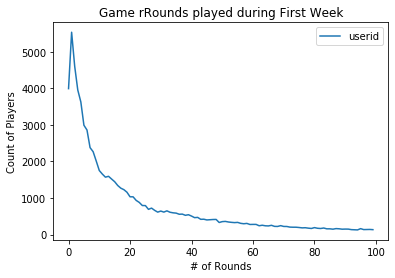

In [33]:
#plotting showing count of # of players for each gameround

%matplotlib inline
graph = game.groupby('sum_gamerounds').count().reset_index()

ax = graph.head(n=100).plot('sum_gamerounds', 'userid')
ax.set_xlabel('# of Rounds')
ax.set_ylabel('Count of Players')
ax.set_title('Game rRounds played during First Week')

## 3. Overall 1-day retention

### From the above graph we can say that some players installed the game but never played it i.e. 0 game rounds and some played it couple of rounds in the first week and got hooked!

### 1-day retention is a common metric in video game industry to find how fun and engaging the game is. 1-day retentio is the percentage of players that comes back and play the game one day after they have installed it. HIgher the 1-day retention is, easier it is to retain players and buils a large player base.  

In [34]:
#1-day retention of the game; percentage of users came back to play after installation

game['retention_1'].mean()

0.4452095044850259

In [35]:
mean_game = game['retention_1'].mean()*100
print('{}% of users came back the day after intallation'.format(round(mean_game,2)))

44.52% of users came back the day after intallation


## 4. 1-day retention by AB-group

### A little less than half of the oplayers come back one day after one day after installing the game. Now that we have a benchmark, calculating the 1-day retention between the two AB-groups gives us much better idea.

In [36]:
#calculating 1-day retention for each AB group

game.groupby('version')['retention_1'].mean()

version
gate_30    0.448188
gate_40    0.442283
Name: retention_1, dtype: float64

## 5. Should we be confiden tin the difference?

### It could be seen that there is a slight ecreaase in 1-day retention when gate was moved to level 40 (44.23%) compared to the control when it was at level 30 (44.82%). Even a small change can have large impact.So how certain should we be that a gate at level 40 will be worse in the future? 

### Here we will be using bootstrapping. We will repeatedly re-sample our dataset (with replacement) and calculate 1-day retention for those samples. The variation in 1-day retention will give us an indication of how uncertain the retention numbers are.

In [38]:
#list of bootstrapped mean for each AB group

boot_1d = []
iterations = 500
for i in range(iterations):
    boot_mean = game.sample(frac = 1, replace = True).groupby('version')['retention_1'].mean()
    boot_1d.append(boot_mean)

In [39]:
#converting bootstrapped mean list into dataframe

boot_1d = pd.DataFrame(boot_1d)
boot_1d.head()

version,gate_30,gate_40
retention_1,0.452770,0.439330
retention_1,0.450181,0.440588
retention_1,0.443313,0.442678
retention_1,0.453121,0.441356
retention_1,0.446010,0.442559


Text(0.5, 0, 'Mean 1-Day Retention')

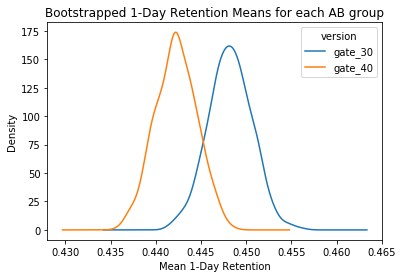

In [40]:
#A Kernal Density Estimate plot of the bootstrap distributions

ax = boot_1d.plot.kde()
ax.set_title('Bootstrapped 1-Day Retention Means for each AB group')
ax.set_xlabel('Mean 1-Day Retention')

## 6. Zooming in on the difference

### The above two distributions above represent the bootstrap uncertainity over what the underlying 1-day retention could be for the two AB-groups. We could see that there is a small difference. To zoom in on the difference in 1-day retention.

(Note: Here we have limited the number of replication to 500 to keep the calculation quick. In "*production*" we could increase this to a much larger number, like, 10000)

In [41]:
#adding a new column to boot_1d showing % difference between two AB groups

boot_1d['%difference'] = ((boot_1d.gate_30 - boot_1d.gate_40)/boot_1d.gate_40 * 100)
boot_1d.head()

version,gate_30,gate_40,%difference
retention_1,0.452770,0.439330,3.059334
retention_1,0.450181,0.440588,2.177254
retention_1,0.443313,0.442678,0.143342
retention_1,0.453121,0.441356,2.665744
retention_1,0.446010,0.442559,0.779754


Text(0.5, 1.0, 'Bootstrap % Difference in 1-Day Retention Means')

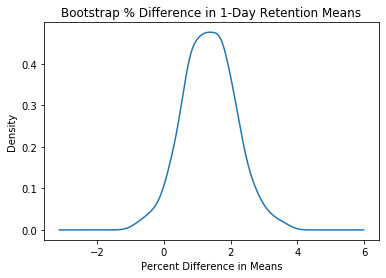

In [42]:
#plotting bootstrap % difference

ax = boot_1d['%difference'].plot.kde()
ax.set_xlabel('Percent Difference in Means')
ax.set_title('Bootstrap % Difference in 1-Day Retention Means')

## 7. The probability of a difference

### Form the above chart, it could be said that the most likely %difference is around 1% - 2% and most of the distribution is above 0%, in favor of a gate at level 30 . Below we calculate the probability that the difference is above 0%. 

In [43]:
#probability that 1-day retention is greater when gate is at level 30

prob = (boot_1d['%difference']>0).sum()/len(boot_1d['%difference'])
prob = prob*100
print('The probability of 1-day retention being greater at level 30 is: {}%'.format(prob))

The probability of 1-day retention being greater at level 30 is: 96.2%


## 8. 7-day retention by AB-group

### The bootstrap analysis tells us that there is a high probability that 1-day retention is better when the gate is at level 30. However, players have only been playin the game for one day, it is not likely that the have reached level 30 yet. This means the players have not been affected by the gate at level 30. 

### But playing for a week, more player should have reached level 40, and it makes sense to also look at 7-day retention. That is: WHat percentage of poeple installed the game also showed up a week later to play the game again.

In [44]:
#calculating 7-day retention for each AB group

game.groupby('version')['retention_7'].mean()

version
gate_30    0.190201
gate_40    0.182000
Name: retention_7, dtype: float64

## 9. Bootstrapping the difference again

### Like with 1-day retention, we see that 7-day retention is slightly lower (18.2%) when the gate is at level 40 than when the gate is at level 30 (19.0%). This difference is also larger than for 1-day retention, presumably because more players have had time to hit the first gate. We also see that the overall 7-day retention is lower than the overall 1-day retention; fewer people play a game a week after installing than a day after installing.

### But as before, using bootstrap analysis to figure out how certain we should be of the difference between the AB-groups.

In [45]:
#list of bootstrapped mean for each AB group

boot_7d = []
iterations = 500
for i in range(iterations):
    boot_mean = game.sample(frac = 1, replace = True).groupby('version')['retention_7'].mean()
    boot_7d.append(boot_mean)

In [46]:
#converting bootstrapped mean list into dataframe

boot_7d = pd.DataFrame(boot_7d)
boot_7d.head()

version,gate_30,gate_40
retention_7,0.189685,0.181385
retention_7,0.188208,0.180855
retention_7,0.190344,0.179579
retention_7,0.191918,0.184300
retention_7,0.194041,0.183187


Text(0.5, 0, 'Mean 7-Day Retention')

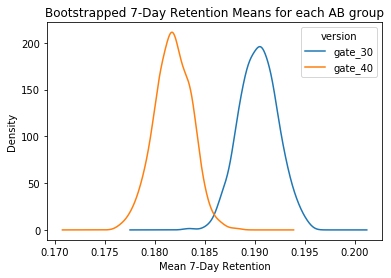

In [47]:
#A Kernal Density Estimate plot of the bootstrap distributions

ax = boot_7d.plot.kde()
ax.set_title('Bootstrapped 7-Day Retention Means for each AB group')
ax.set_xlabel('Mean 7-Day Retention')

In [48]:
#adding a new column to boot_7d showing % difference between two AB groups

boot_7d['%difference'] = ((boot_7d.gate_30 - boot_7d.gate_40)/boot_7d.gate_40 * 100)
boot_7d.head()

version,gate_30,gate_40,%difference
retention_7,0.189685,0.181385,4.575612
retention_7,0.188208,0.180855,4.065456
retention_7,0.190344,0.179579,5.994583
retention_7,0.191918,0.184300,4.133274
retention_7,0.194041,0.183187,5.925018


Text(0.5, 1.0, 'Bootstrap % Difference in 7-Day Retention Means')

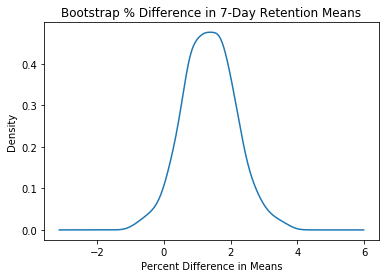

In [49]:
#plotting bootstrap % difference

ax = boot_1d['%difference'].plot.kde()
ax.set_xlabel('Percent Difference in Means')
ax.set_title('Bootstrap % Difference in 7-Day Retention Means')

In [50]:
#probability that 7-day retention is greater when gate is at level 30

prob = (boot_7d['%difference']>0).sum()/len(boot_7d['%difference'])
prob = prob*100
print('The probability of 7-day retention being greater at level 30 is: {}%'.format(prob))

The probability of 7-day retention being greater at level 30 is: 99.8%


## 10. The Conclusion

### The bootstrap result tells us that there is strong evidence that 7-day retention is higher when the gate is at level 30 than when it is at level 40. The conclusion is: If we want to keep retention high — both 1-day and 7-day retention — we should not move the gate from level 30 to level 40. 

There are, of course, other metrics we could look at, like the number of game rounds played or how much in-game purchases are made by the two AB-groups. But retention is one of the most important metrics. If we don't retain our player base, it doesn't matter how much money they spend in-game.

So, why is retention higher when the gate is positioned earlier? One could expect the opposite: The later the obstacle, the longer people are going to engage with the game. But this is not what the data tells us. The theory of hedonic adaptation can give one explanation for this.

In short, hedonic adaptation is the tendency for people to get less and less enjoyment out of a fun activity over time if that activity is undertaken continuously. By forcing players to take a break when they reach a gate, their enjoyment of the game is prolonged. But when the gate is moved to level 40, fewer players make it far enough, and they are more likely to quit the game because they simply got bored of it.